In [46]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

import mlbase.utilities.mlutilities as ml

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [43]:
vol = '/s/chopin/l/grad/stock/nvme/data/cs/intel-img/'
train_dir = os.path.join(vol, 'seg_train')
test_dir = os.path.join(vol, 'seg_test')

class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [53]:
def load_data(dir, class_names):
    W,H = 128,128
    X, T = [], []
    for t, class_name in enumerate(class_names):
        class_dir = os.path.join(dir, class_name)
        for file in os.listdir(class_dir):
            img = cv2.imread(os.path.join(class_dir, file))
            img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (W,H)) / 255.
            X.append(img)
            T.append(t)
    return np.stack(X).transpose(0,3,1,2), np.array(T).reshape(-1,1)

In [54]:
Xtrain, Ttrain = load_data(train_dir, class_names)
Xtest, Ttest = load_data(test_dir, class_names)

Xtrain, Ttrain, Xval, Tval = ml.partition(Xtrain, Ttrain, 0.80, shuffle=True, 
                                          classification=True, seed=1234)

print(np.unique(Ttrain, return_counts=True), 
      np.unique(Tval, return_counts=True),
      np.unique(Ttest, return_counts=True), sep='\n')

(array([0, 1, 2, 3, 4, 5]), array([2010, 1906, 1923, 1753, 1819, 1817]))
(array([0, 1, 2, 3, 4, 5]), array([502, 476, 481, 438, 455, 454]))
(array([0, 1, 2, 3, 4, 5]), array([525, 501, 553, 437, 510, 474]))


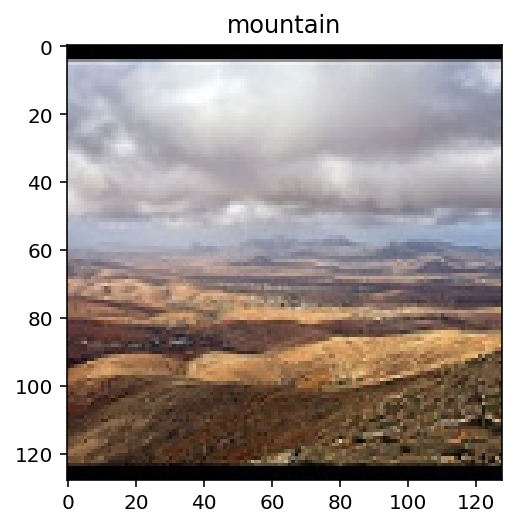

In [55]:
i = 3
plt.imshow(Xtrain[i].transpose(1,2,0))
plt.title(class_names[Ttrain[i,0]])
plt.show()

In [56]:
means, stds = ((0.4951, 0.4982, 0.4979), (0.2482, 0.2467, 0.2807))
means = np.array(means).reshape(1, 3, 1, 1)
stds = np.array(stds).reshape(1, 3, 1, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


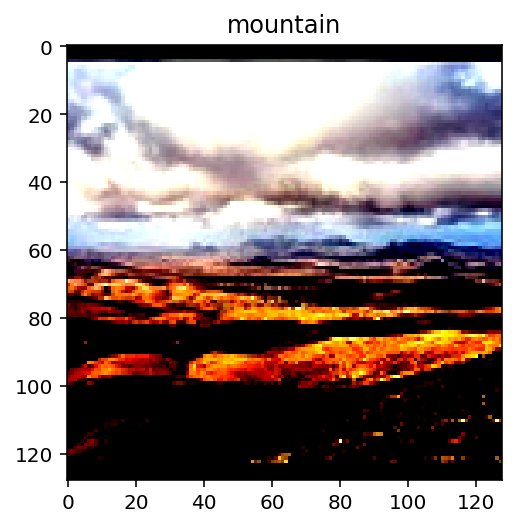

In [57]:
result = (Xtrain - means) / stds
i = 3
plt.imshow(result[i].transpose(1,2,0))
plt.title(class_names[Ttrain[i,0]])
plt.show()

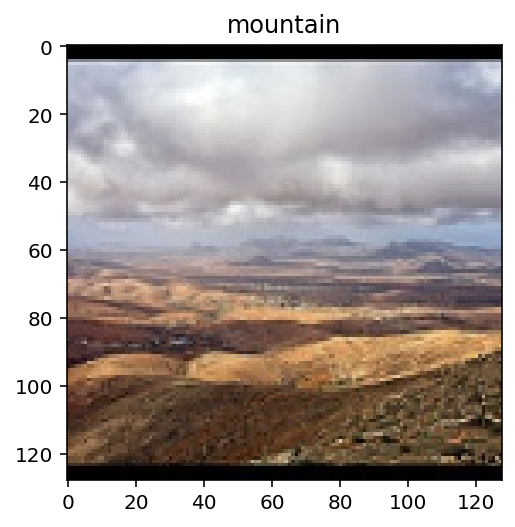

In [58]:
result = result * stds + means
i = 3
plt.imshow(result[i].transpose(1,2,0))
plt.title(class_names[Ttrain[i,0]])
plt.show()